# 1. Install and Import Dependencies

In [1]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [4]:
pip install matplotlib numpy opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade torch

Note: you may need to restart the kernel to use updated packages.


In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\pc/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-29 Python-3.11.7 torch-2.3.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [8]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [9]:
img = 'https://images.pexels.com/photos/2422290/pexels-photo-2422290.jpeg?cs=srgb&dl=pexels-jopwell-2422290.jpg&fm=jpg'

In [10]:
results = model(img)
results.print()

image 1/1: 2591x3600 5 persons, 1 wine glass, 2 cups, 1 chair, 2 potted plants, 1 vase
Speed: 859.2ms pre-process, 331.1ms inference, 15.7ms NMS per image at shape (1, 3, 480, 640)


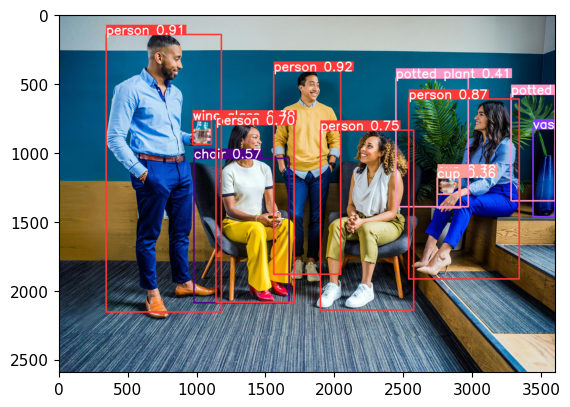

In [11]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [12]:
results.render()

[array([[[132, 164, 175],
         [133, 165, 176],
         [135, 167, 178],
         ...,
         [113, 130, 140],
         [106, 123, 133],
         [103, 120, 130]],
 
        [[113, 145, 156],
         [113, 145, 156],
         [114, 146, 157],
         ...,
         [108, 125, 135],
         [ 95, 112, 122],
         [ 89, 106, 116]],
 
        [[121, 153, 164],
         [119, 151, 162],
         [118, 150, 161],
         ...,
         [ 97, 114, 124],
         [ 92, 109, 119],
         [ 95, 112, 122]],
 
        ...,
 
        [[ 53,  80, 109],
         [ 47,  74, 101],
         [ 44,  70,  95],
         ...,
         [226, 218, 197],
         [226, 218, 197],
         [226, 218, 197]],
 
        [[ 67,  94, 123],
         [ 56,  83, 112],
         [ 48,  74, 101],
         ...,
         [225, 217, 196],
         [225, 217, 196],
         [225, 217, 196]],
 
        [[ 81, 106, 137],
         [ 67,  92, 122],
         [ 55,  78, 109],
         ...,
         [225, 217, 196],
  

# 4. Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [13]:
import uuid   # Unique identifier
import os
import time

In [15]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [17]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [18]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.cd6f686a-1df3-11ef-b968-8032532e3055.jpg


In [19]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.14ff7c64-1df4-11ef-973b-8032532e3055.jpg
data\images\awake.14ff92b0-1df4-11ef-bcaf-8032532e3055.jpg
data\images\awake.14ff92b1-1df4-11ef-b90f-8032532e3055.jpg
data\images\awake.14ff92b2-1df4-11ef-957e-8032532e3055.jpg
data\images\awake.14ff92b3-1df4-11ef-9236-8032532e3055.jpg
data\images\awake.14ff92b4-1df4-11ef-a74d-8032532e3055.jpg
data\images\awake.14ff92b5-1df4-11ef-8881-8032532e3055.jpg
data\images\awake.14ff92b6-1df4-11ef-8f5e-8032532e3055.jpg
data\images\awake.14ff92b7-1df4-11ef-8581-8032532e3055.jpg
data\images\awake.14ff92b8-1df4-11ef-aaf8-8032532e3055.jpg
data\images\awake.14ff92b9-1df4-11ef-9944-8032532e3055.jpg
data\images\awake.14ff92ba-1df4-11ef-9f9f-8032532e3055.jpg
data\images\awake.14ffbb4e-1df4-11ef-8d5d-8032532e3055.jpg
data\images\awake.14ffbf94-1df4-11ef-b3dd-8032532e3055.jpg
data\images\awake.14ffbf95-1df4-11ef-827e-8032532e3055.jpg
data\images\awake.14ffbf96-1df4-11ef-9208-8032532e3055.jpg
data\images\awake.14ffbf97-1df4-11ef-91d2-8032532e3055.j

In [20]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [21]:
!pip install pyqt5 lxml --upgrade 
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [31]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

^C


# 6. Load Custom Model

In [44]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\pc/.cache\torch\hub\master.zip
YOLOv5  2024-5-29 Python-3.11.7 torch-2.3.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [45]:
img = os.path.join('data', 'images', 'awake.9b27ba57-1df3-11ef-ae23-8032532e3055.jpg')

In [46]:
results = model(img)

In [47]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 32.6ms pre-process, 1071.3ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


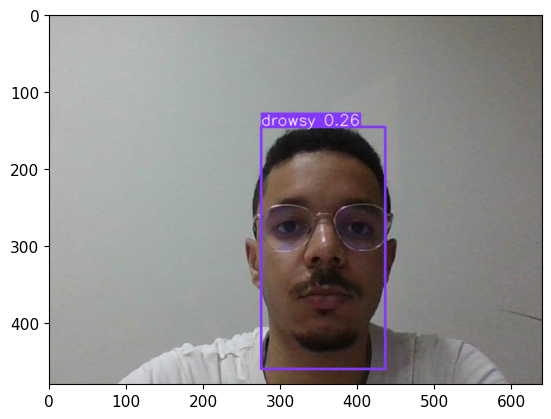

In [48]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [49]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()